In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Reading data from "day.csv" file and creating Dataframe 'df'

df = pd.read_csv(r'D:\MASTERS\Linear_Regression_Assignment\day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Shape of the Dataframe

df.shape

(730, 16)

In [7]:
# Dropping some of the features

df = df.drop(['instant','dteday','casual','registered','atemp'], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [8]:
# Shape of the Dataframe after dropping some of the features

df.shape

(730, 11)

In [9]:
# Describing Dataframe

df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,97.250000,34.000021,8714.000000


In [10]:
# Checking if null value present or not

df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64

In [11]:
# Dataframe Information providing 'Non-Null Count' & 'Dtype' for the features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


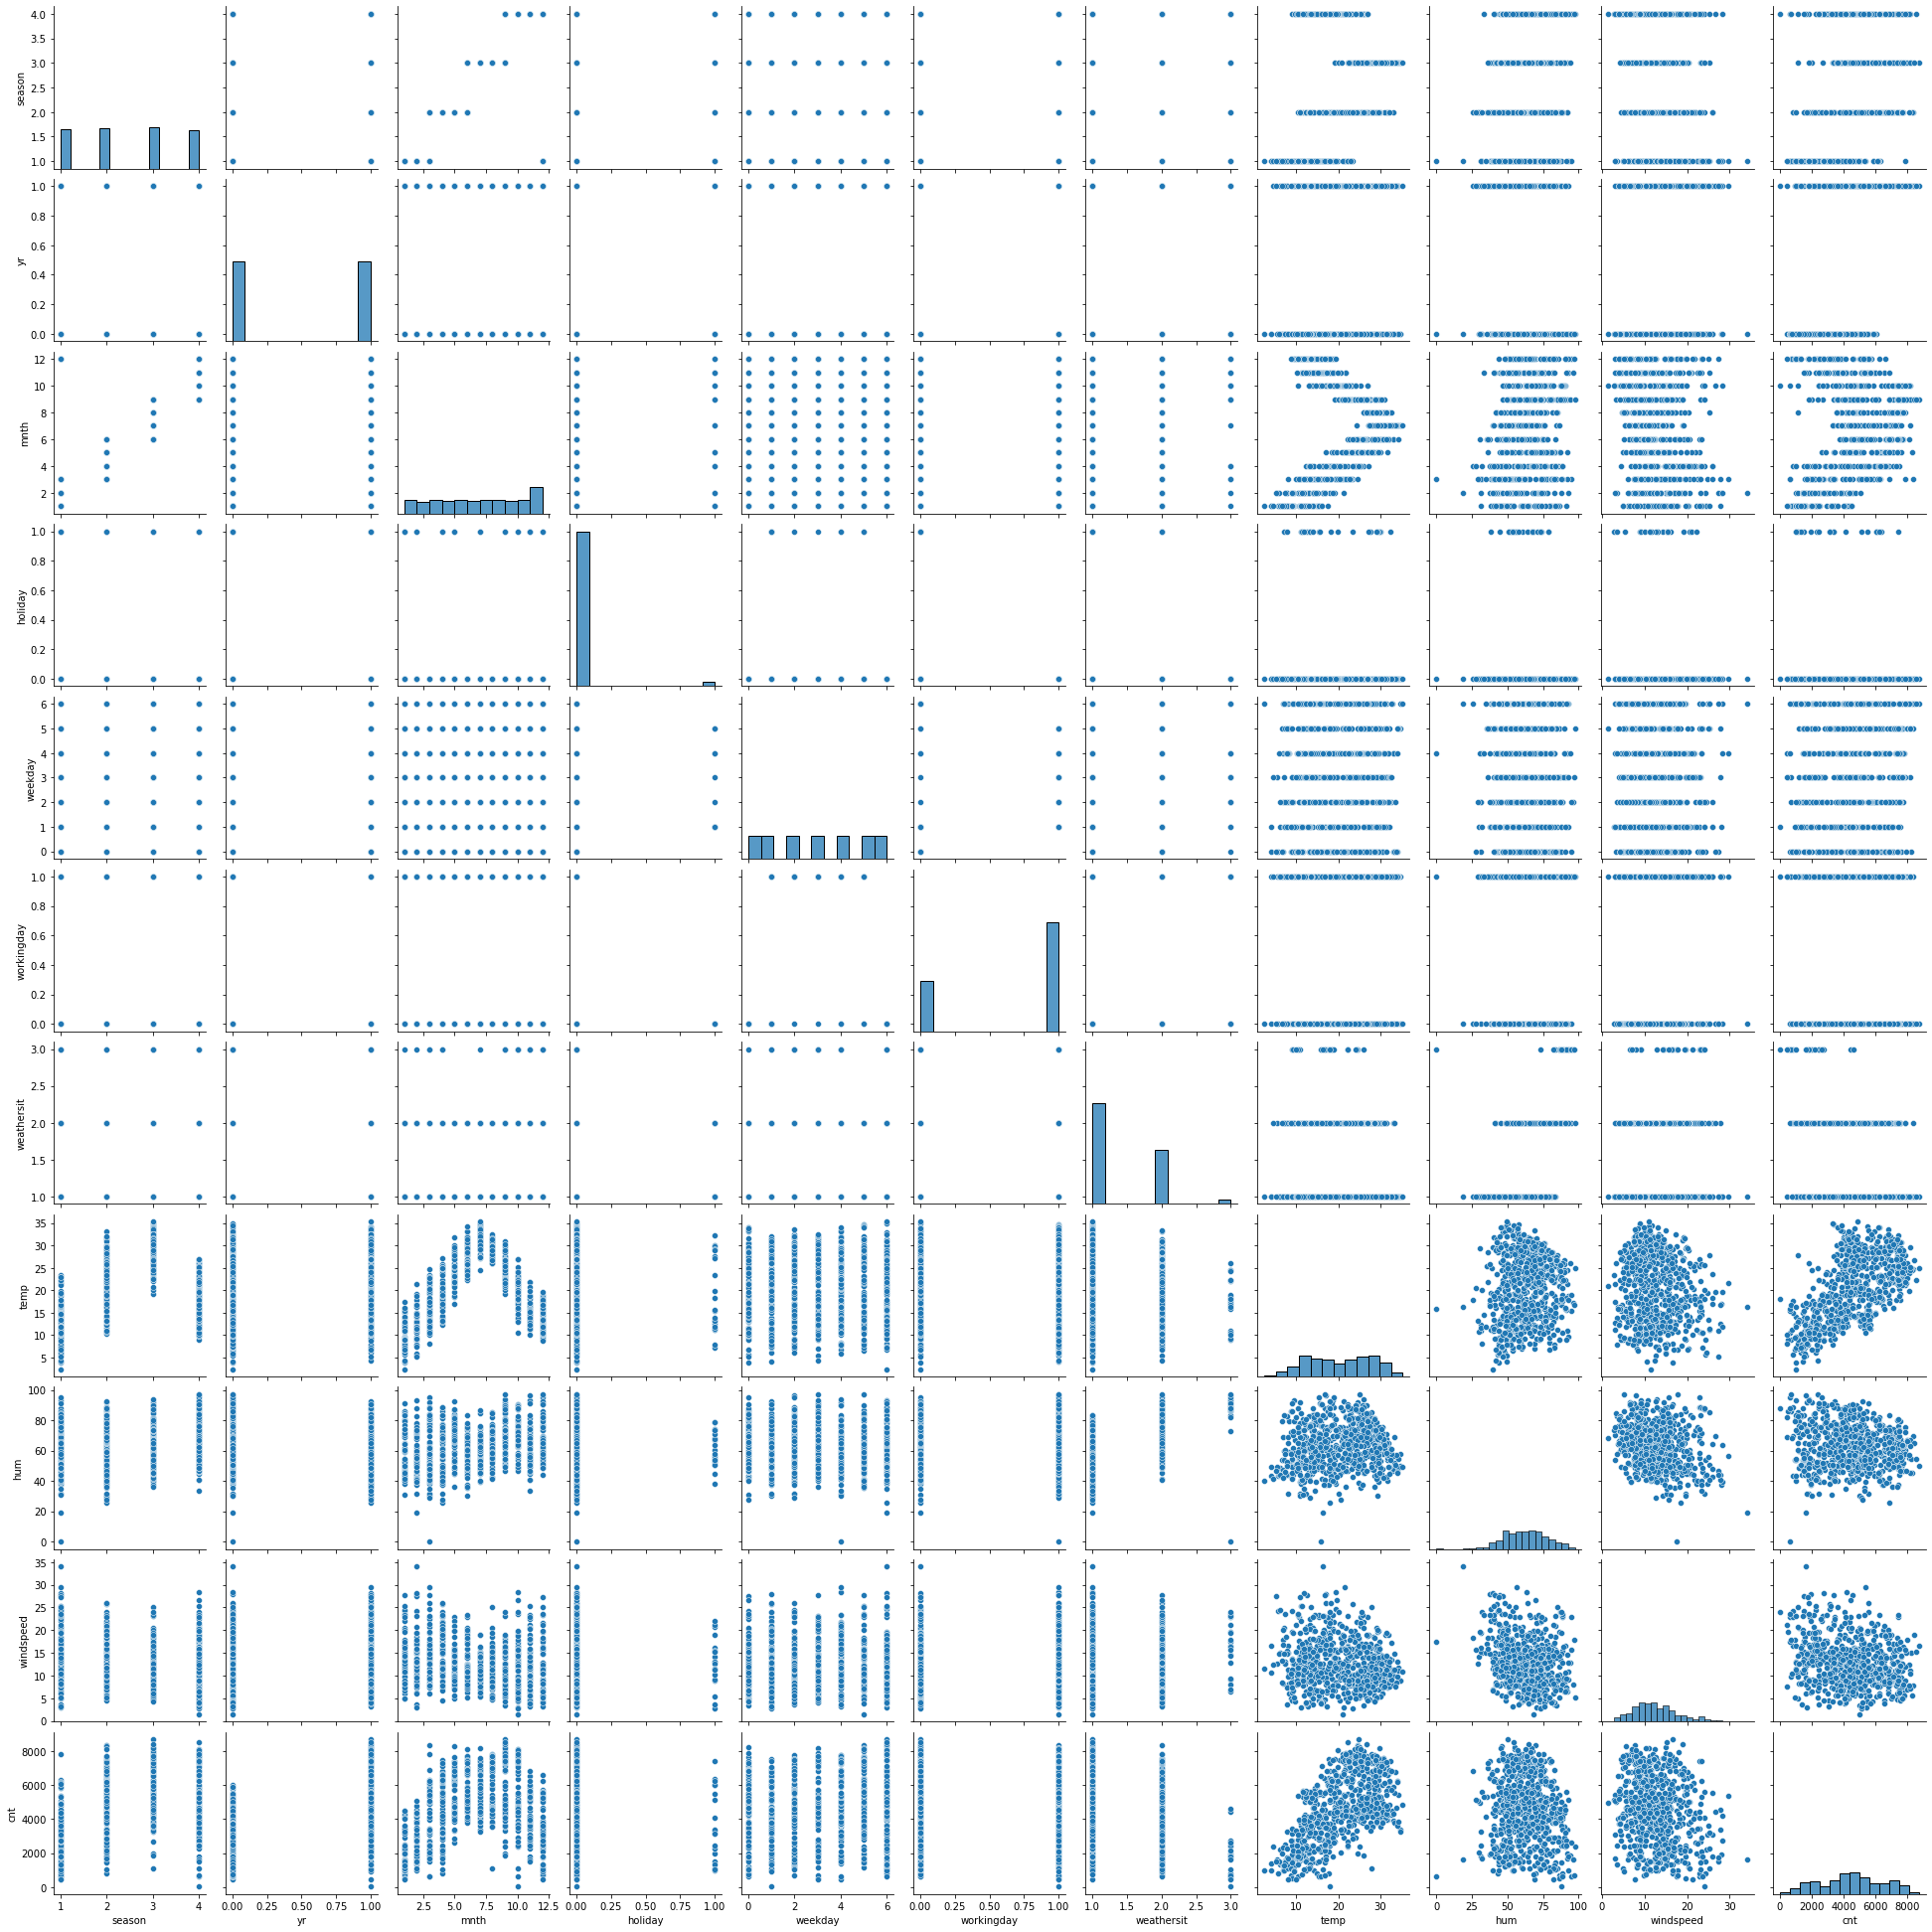

In [12]:
# Pairwise scatter plots

sns.pairplot(df)
plt.show()

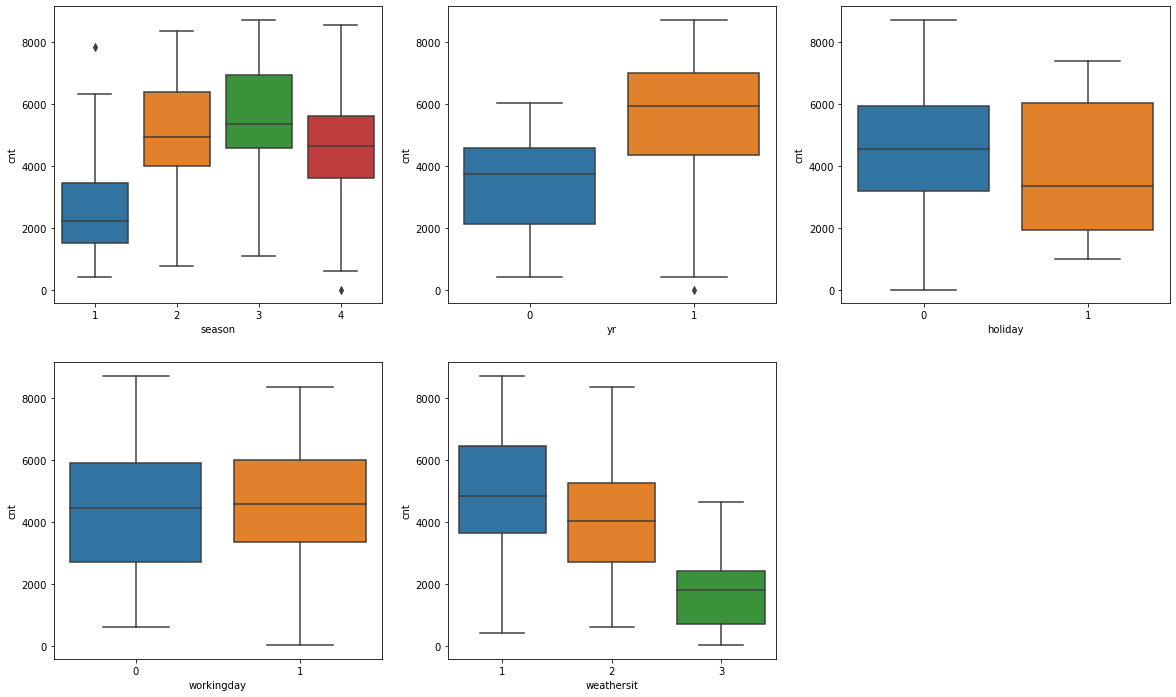

In [13]:
# Boxplots

plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
sns.boxplot(x='season', y = 'cnt', data = df)
plt.subplot(2, 3, 2)
sns.boxplot(x='yr', y = 'cnt', data = df)
plt.subplot(2, 3, 3)
sns.boxplot(x='holiday', y = 'cnt', data = df)
plt.subplot(2, 3, 4)
sns.boxplot(x='workingday', y = 'cnt', data = df)
plt.subplot(2, 3, 5)
sns.boxplot(x='weathersit', y = 'cnt', data = df)
plt.show()

In [14]:
# Training and Test splitting

df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 11)
(219, 11)


In [16]:
# Normalisation of feature values using MinMaxScaler for Training

scaler = MinMaxScaler()
num_vars = ['season','mnth','weekday','weathersit','temp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
653,1.000000,1,0.818182,0,0.333333,1,0.0,0.509887,0.575354,0.300794,0.864243
576,0.666667,1,0.545455,0,0.333333,1,0.0,0.815169,0.725633,0.264686,0.827658
426,0.000000,1,0.181818,0,1.000000,0,0.5,0.442393,0.640189,0.255342,0.465255
728,0.000000,1,1.000000,0,0.000000,0,0.0,0.245101,0.498067,0.663106,0.204096
482,0.333333,1,0.272727,0,1.000000,0,0.5,0.395666,0.504508,0.188475,0.482973


In [17]:
# Describing Training Dataframe

df_train[num_vars].describe()

,season,mnth,weekday,weathersit,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000
mean,0.505882,0.504456,0.498366,0.20098,0.537262,0.650369,0.320768,0.513620
std,0.370649,0.315338,0.336182,0.27377,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.181818,0.166667,0.00000,0.339853,0.538643,0.199179,0.356420
50%,0.666667,0.545455,0.500000,0.00000,0.540519,0.653714,0.296763,0.518638
75%,0.666667,0.818182,0.833333,0.50000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


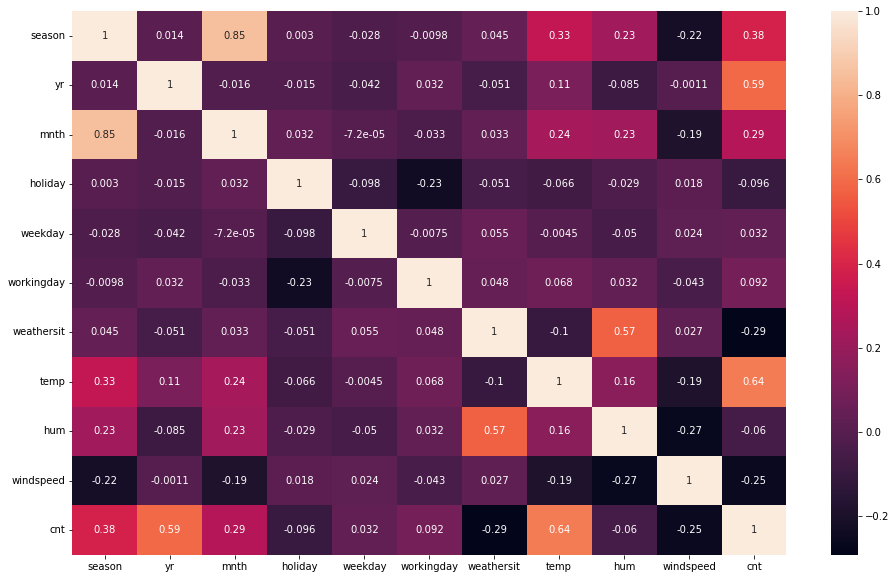

In [18]:
# Heatmap on Training Dataframe

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

In [19]:
# Setting X_train & y_train

y_train = df_train.pop('cnt')
X_train = df_train
X_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
653,1.000000,1,0.818182,0,0.333333,1,0.0,0.509887,0.575354,0.300794
576,0.666667,1,0.545455,0,0.333333,1,0.0,0.815169,0.725633,0.264686
426,0.000000,1,0.181818,0,1.000000,0,0.5,0.442393,0.640189,0.255342
728,0.000000,1,1.000000,0,0.000000,0,0.0,0.245101,0.498067,0.663106
482,0.333333,1,0.272727,0,1.000000,0,0.5,0.395666,0.504508,0.188475


In [ ]:
# Assumption
# Model p-values < 0.5 and VIFs < 5 for the given features

In [20]:
# Adding a constant and building a model with all features

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const         0.185826
season        0.145635
yr            0.234544
mnth         -0.018019
holiday      -0.071270
weekday       0.046458
workingday    0.019182
weathersit   -0.164403
temp          0.471405
hum          -0.087817
windspeed    -0.166249
dtype: float64

In [21]:
# Summary of the model

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     204.7
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.84e-169
Time:                        21:45:48   Log-Likelihood:                 454.07
No. Observations:                 510   AIC:                            -886.1
Df Residuals:                     499   BIC:                            -839.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1858      0.032      5.820      0.000       0.123       0.249
season         0.1456      0.024      6.107      0.000       0.099       0.192
yr             0.2345      0.009     26.011      0.000       0.217       0.252
mnth          -0.0180      0.027     -0.659      0.510      -0.072       0.036
holiday       -0.0713      0.029     -2.434      0.015      -0.129      -0.014
weekday        0.0465      0.013      3.456      0.001       0.020       0.073
workingday     0.0192      0.010      1.952      0.051      -0.000       0.038
weathersit    -0.1644      0.021     -7.834      0.000      -0.206      -0.123
temp           0.4714      0.022     21.582      0.000       0.428       0.514
hum           -0.0878      0.041     -2.120      0.034      -0.169      -0.006
windspeed     -0.1662      0.028     -5.868      0.000      -0.222      -0.111
==============================================================================
Omnibus:                       57.074   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.433
Skew:                          -0.613   Prob(JB):                     2.13e-28
Kurtosis:                       5.120   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Creating a Dataframe that will contain features of the 'X_train' and their VIF values

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
8,hum,15.29
2,mnth,13.32
0,season,11.30
7,temp,7.95
9,windspeed,3.66
5,workingday,3.14
4,weekday,3.03
6,weathersit,2.17
1,yr,2.01
3,holiday,1.09


In [23]:
# Dropping feature 'mnth' as it has p-value = 0.510

X = X_train.drop('mnth', axis=1)

In [24]:
# Adding a constant and building a model with features available in 'X' after dropping feature 'mnth'

X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const         0.184505
season        0.132489
yr            0.234732
holiday      -0.072156
weekday       0.045913
workingday    0.019353
weathersit   -0.163265
temp          0.472739
hum          -0.090743
windspeed    -0.166492
dtype: float64

In [25]:
# Summary of the model

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     227.6
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.47e-170
Time:                        21:46:13   Log-Likelihood:                 453.85
No. Observations:                 510   AIC:                            -887.7
Df Residuals:                     500   BIC:                            -845.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1845      0.032      5.794      0.000       0.122       0.247
season         0.1325      0.013     10.141      0.000       0.107       0.158
yr             0.2347      0.009     26.060      0.000       0.217       0.252
holiday       -0.0722      0.029     -2.469      0.014      -0.130      -0.015
weekday        0.0459      0.013      3.424      0.001       0.020       0.072
workingday     0.0194      0.010      1.972      0.049    6.71e-05       0.039
weathersit    -0.1633      0.021     -7.810      0.000      -0.204      -0.122
temp           0.4727      0.022     21.749      0.000       0.430       0.515
hum           -0.0907      0.041     -2.205      0.028      -0.172      -0.010
windspeed     -0.1665      0.028     -5.881      0.000      -0.222      -0.111
==============================================================================
Omnibus:                       56.392   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.747
Skew:                          -0.607   Prob(JB):                     4.95e-28
Kurtosis:                       5.109   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Creating a Dataframe that will contain features of the 'X' and their VIF values

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
7,hum,14.35
6,temp,7.89
8,windspeed,3.65
0,season,3.39
4,workingday,3.14
3,weekday,3.01
5,weathersit,2.14
1,yr,2.01
2,holiday,1.09


In [27]:
# Dropping feature 'hum' as its VIF = 14.35

X = X.drop('hum', axis=1)

In [28]:
# Adding a constant and building a model with features available in 'X' after dropping feature 'hum'

X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const         0.129072
season        0.128878
yr            0.236715
holiday      -0.072363
weekday       0.048906
workingday    0.019721
weathersit   -0.191627
temp          0.464158
windspeed    -0.148376
dtype: float64

In [29]:
# Summary of the model

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     253.5
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          9.98e-171
Time:                        21:46:55   Log-Likelihood:                 451.38
No. Observations:                 510   AIC:                            -884.8
Df Residuals:                     501   BIC:                            -846.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1291      0.020      6.578      0.000       0.091       0.168
season         0.1289      0.013      9.905      0.000       0.103       0.154
yr             0.2367      0.009     26.311      0.000       0.219       0.254
holiday       -0.0724      0.029     -2.466      0.014      -0.130      -0.015
weekday        0.0489      0.013      3.652      0.000       0.023       0.075
workingday     0.0197      0.010      2.002      0.046       0.000       0.039
weathersit    -0.1916      0.017    -11.586      0.000      -0.224      -0.159
temp           0.4642      0.021     21.622      0.000       0.422       0.506
windspeed     -0.1484      0.027     -5.455      0.000      -0.202      -0.095
==============================================================================
Omnibus:                       55.391   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.353
Skew:                          -0.605   Prob(JB):                     7.34e-27
Kurtosis:                       5.049   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Creating a Dataframe that will contain features of the 'X' and their VIF values

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
6,temp,5.80
7,windspeed,3.31
0,season,3.15
4,workingday,2.92
3,weekday,2.86
1,yr,2.00
5,weathersit,1.53
2,holiday,1.07


In [31]:
# Using model to predit y_train_pred

y_train_pred = lr_model.predict(X_train_sm)

In [ ]:
# The above given is the final model as it has p-values < 0.5 and VIFs < 5 of the given features

<AxesSubplot:ylabel='Density'>

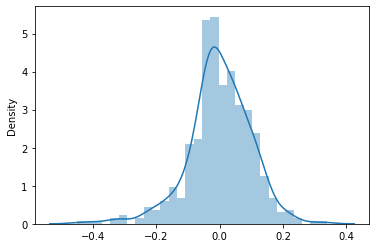

In [32]:
# Residual Analysis

res = y_train - y_train_pred
sns.distplot(res)

In [33]:
# Normalisation of feature values using MinMaxScaler for Testing

num_vars = ['season','mnth','weekday','weathersit','temp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
184,0.666667,0,0.545455,1,0.166667,0,0.5,0.831783,0.657364,0.084219,0.692706
535,0.333333,1,0.454545,0,0.500000,1,0.0,0.901354,0.610133,0.153728,0.712034
299,1.000000,0,0.818182,0,0.666667,1,0.5,0.511964,0.837699,0.334206,0.303382
221,0.666667,0,0.636364,0,0.500000,1,0.0,0.881625,0.437098,0.339570,0.547400
152,0.333333,0,0.454545,0,0.666667,1,0.0,0.817246,0.314298,0.537414,0.569029


In [34]:
# Describing Testing Dataframe

df_test[num_vars].describe()

,season,mnth,weekday,weathersit,temp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.485540,0.497717,0.503044,0.187215,0.558941,0.638508,0.313350,0.520592
std,0.369821,0.311080,0.331402,0.269422,0.233698,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.272727,0.166667,0.000000,0.354650,0.527265,0.198517,0.377531
50%,0.333333,0.454545,0.500000,0.000000,0.558691,0.627737,0.299459,0.524275
75%,0.666667,0.727273,0.833333,0.500000,0.759096,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


In [35]:
# Setting X_test & y_test

y_test = df_test.pop('cnt')
X_test = df_test

In [36]:
# Adding a constant to the features

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
184,1.0,0.666667,0,0.545455,1,0.166667,0,0.5,0.831783,0.657364,0.084219
535,1.0,0.333333,1,0.454545,0,0.500000,1,0.0,0.901354,0.610133,0.153728
299,1.0,1.000000,0,0.818182,0,0.666667,1,0.5,0.511964,0.837699,0.334206
221,1.0,0.666667,0,0.636364,0,0.500000,1,0.0,0.881625,0.437098,0.339570
152,1.0,0.333333,0,0.454545,0,0.666667,1,0.0,0.817246,0.314298,0.537414


In [39]:
# Dropping features those were not part of final training model

X_test_sm = X_test_sm.drop(['mnth','hum'], axis=1)

In [40]:
# Predicting 'y_test_pred' based on 'X_test_sm'

y_test_pred = lr_model.predict(X_test_sm)

In [41]:
# Evaluation using r2score

r2_score(y_true=y_test, y_pred=y_test_pred)

0.7786089428454818